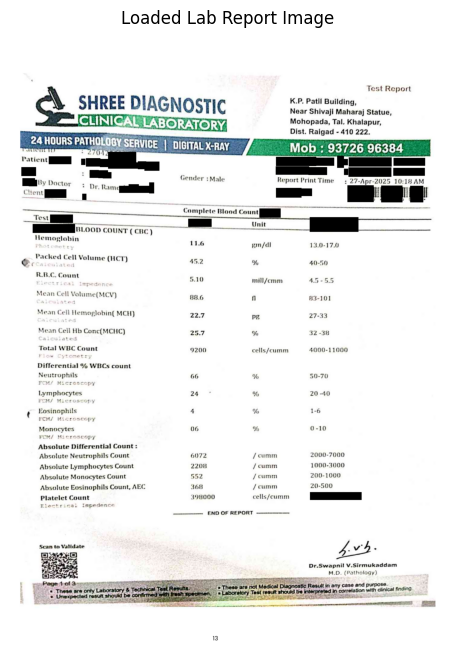

Test Report

K.P. Patil Building,
Near Shivaji Maharaj Statue,
Mohopada, Tal. Khalapur,

Dist. Raigad - 410 222.

Mob ; 93726 96384

\. SHREE DIAGNOSTIC

Patient -
= :

Hy Doctor
> Dr. Rame
Cheng mil

Gender :Male

Complete Blood C ,

Unit

OOD COUNT (CBC)
Hemoglobin

11.6 yin/dl 13.0-17.0
Packed Ce ss .

e Packed Cell Volume (HCT) 45.2 % 40-50
RBC. Count - 5.10 mill/emm 4.5-5.5
Mean Cell Volume(MCV) 88.6 fl 83-101
Mean Cell Hemoglobin( MCH) 22:7. pg 27-33
Mean Cell Hb Conc(MCHC) 25.7 % 32-38
Total WBC Count 9200 cells/ecumm 4000-11000
Differential % WBCs count
csc. i ae 66 % 50-70
FOM/ Microsce PY
I A sical 24 e % 20 -40

Seat 4 % 1-6
¢ Eosinophils
FCM/ “icroscopy
Monocytes 06 % 0-10
FCM/ Microncopy
Absolute Differential Count :
Absolute Neutrophils Count 6072 /cumm 2000-7000
Absolute Lymphocytes Count 2208 /cumm 1000-3000
Absolute Monocytes Count 552 /cumm 200-1000
Absolute Eosinophils Count, AEC 368 /cumm 20-500

Platelet Count 398000 cells/cumm fF

Electrical impedence

END OF REPO

In [2]:
# importing necessary libraries
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re
from PIL import Image
from typing import Dict

# Point pytesseract at your tesseract.exe
TESSERACT_ENGINE_PATH = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Windows example
pytesseract.pytesseract.tesseract_cmd = TESSERACT_ENGINE_PATH

# Path of your lab-report image file
IMAGE_PATH = r"E:\bajajdata\data\AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_13.png"

# --- 1. Load the image ---
# Option A: with PIL (good for pytesseract directly)
pil_img = Image.open(IMAGE_PATH).convert("RGB")

# Option B: with OpenCV (good if you want to preprocess via cv2)
cv_img = cv2.imread(IMAGE_PATH)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

# --- 2. (Optional) visualize ---
plt.figure(figsize=(6,8))
plt.imshow(pil_img)      # or plt.imshow(cv_img)
plt.axis("off")
plt.title("Loaded Lab Report Image")
plt.show()

# --- 3. OCR the image ---
# You can feed PIL or a NumPy array directly into pytesseract:
text = pytesseract.image_to_string(pil_img, lang="eng")
print(text)

# --- 4. (Optional) post-process the raw text ---
# For example, to pull out test names/values/ranges with regex:
pattern = re.compile(r"(?P<name>[\w\s]+?)\s+(?P<value>[\d.]+)\s+(?P<range>[\d.-]+)")
for m in pattern.finditer(text):
    print(f"{m.group('name').strip():<25} {m.group('value'):>6}   {m.group('range')}")

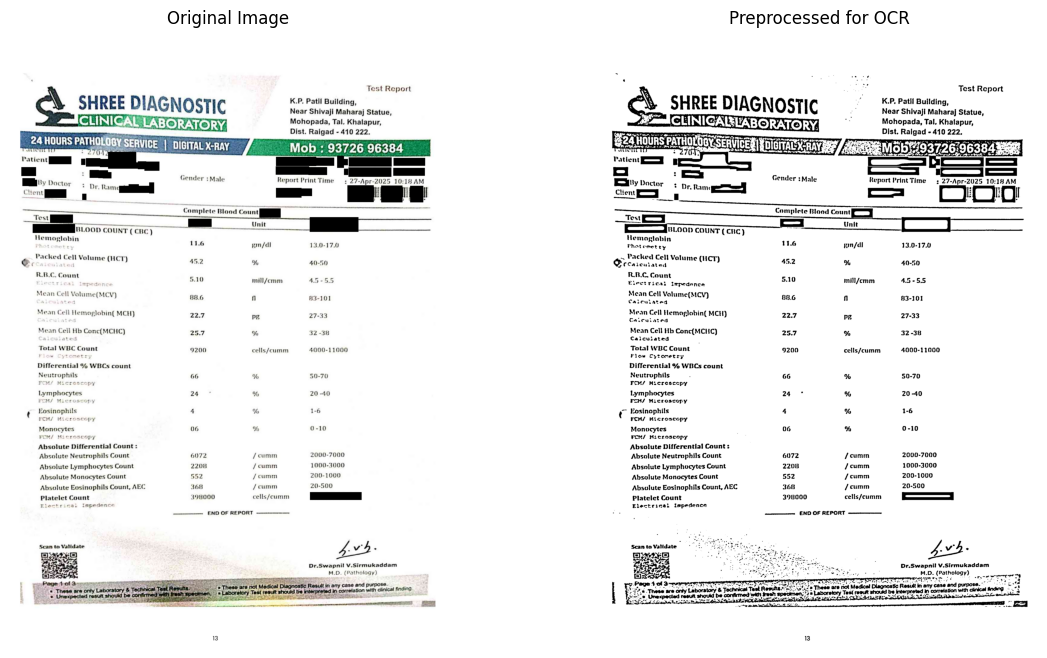

=== OCR on Original ===
Test Report

K.P. Patil Building,
Near Shivaji Maharaj Statue,
Mohopada, Tal. Khalapur,

Dist. Raigad - 410 222.

Mob ; 93726 96384

\. SHREE DIAGNOSTIC

Patient -
= :

Hy Doctor
> Dr. Rame
Cheng mil

Gender :Male

Complete Blood C ,

Unit

OOD COUNT (CBC)
Hemoglobin

11.6 yin/dl 13.0-17.0
Packed Ce ss .

e Packed Cell Volume (HCT) 45.2 % 40-50
RBC. Count - 5.10 mill/emm 4.5-5.5
Mean Cell Volume(MCV) 88.6 fl 83-101
Mean Cell Hemoglobin( MCH) 22:7. pg 27-33
Mean Cell Hb Conc(MCHC) 25.7 % 32-38
Total WBC Count 9200 cells/ecumm 4000-11000
Differential % WBCs count
csc. i ae 66 % 50-70
FOM/ Microsce PY
I A sical 24 e % 20 -40

Seat 4 % 1-6
¢ Eosinophils
FCM/ “icroscopy
Monocytes 06 % 0-10
FCM/ Microncopy
Absolute Differential Count :
Absolute Neutrophils Count 6072 /cumm 2000-7000
Absolute Lymphocytes Count 2208 /cumm 1000-3000
Absolute Monocytes Count 552 /cumm 200-1000
Absolute Eosinophils Count, AEC 368 /cumm 20-500

Platelet Count 398000 cells/cumm fF

Electrica

In [ ]:
def preprocess_image(img: Image.Image) -> np.ndarray:
    """
    Input: a PIL Image
    Output: a binary, thresholded numpy array ready for OCR
    """
    # Convert PIL to BGR numpy array for OpenCV
    cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    processed = cv2.adaptiveThreshold(
        resized,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        63,
        12
    )
    return processed

# --- 3. Preprocess the image ---
pre_img = preprocess_image(pil_img)

# --- 4. Visualize original vs. preprocessed ---
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(pil_img)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(pre_img, cmap="gray")
plt.axis("off")
plt.title("Preprocessed for OCR")

plt.show()

# --- 5. OCR both versions and print ---
# print("=== OCR on Original ===")
# text_orig = pytesseract.image_to_string(pil_img, lang="eng")
# print(text_orig)

print("\n=== OCR on Preprocessed ===")
text_prep = pytesseract.image_to_string(pre_img, lang="eng")
print(text_prep)

# --- 6. (Optional) parse out test name/value/range ---
pattern = re.compile(r"(?P<name>[\w\s]+?)\s+(?P<value>[\d.]+)\s+(?P<range>[\d.-]+)")
print("\n=== Parsed fields from preprocessed OCR ===")
for m in pattern.finditer(text_prep):
    name = m.group("name").strip()
    value = m.group("value")
    rng   = m.group("range")
    print(f"{name:<25} {value:>6}   {rng}")